In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import pandas as pd
import numpy as np

import folium

import os
print(os.listdir("../input"))

['ipldata', 'ipl2020-players-dataset']


In [2]:
data=pd.read_csv('../input/ipldata/matches.csv',index_col=0)
print(data.shape)

deliveries=pd.read_csv('../input/ipldata/deliveries.csv',index_col=0)
print(deliveries.shape)

(756, 17)
(179078, 20)


In [3]:
data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's look at cities to have hosted a IPL GAME**

In [4]:
data['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

**Two points:**

*** 1. There are 7 NaN values. On closer inspection we find all NaN values belong to venue of Dubai International Cricket Stadium ***

*** 2. Bangalore underwent a name change to Bengaluru ***

In [5]:
data[data['city'].isnull()==True]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [6]:
data['city'].fillna('Dubai',inplace=True)

In [7]:
data.at[data['city']=='Bangalore','city']='Bengaluru'

In [8]:
print("Cities --> ",data['city'].nunique())
print("Venues --> ",data['venue'].nunique())

Cities -->  32
Venues -->  41


In [9]:
data.groupby(['city','venue']).all().index.to_frame(index=None)

,city,venue
0,Abu Dhabi,Sheikh Zayed Stadium
1,Ahmedabad,"Sardar Patel Stadium, Motera"
2,Bengaluru,M Chinnaswamy Stadium
3,Bengaluru,M. Chinnaswamy Stadium
4,Bloemfontein,OUTsurance Oval
5,Cape Town,Newlands
6,Centurion,SuperSport Park
7,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
8,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
9,Chennai,M. A. Chidambaram Stadium


In [10]:
deliveries

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya


In [11]:
data.at[data['city']=='Visakhapatnam','venue']='ACA-VDCA Stadium'
data.at[data['city']=='Pune','venue']='Maharashtra Cricket Association Stadium'
data.at[data['city']=='Chandigarh','city']='Mohali'
data.at[data['city']=='Mohali','venue']='IS Bindra Stadium'
data.at[data['city']=='Hyderabad','venue']='Rajiv Gandhi International Stadium, Uppal'
data.at[data['city']=='Delhi','venue']='Feroz Shah Kotla Ground'
data.at[data['city']=='Chennai','venue']='M. A. Chidambaram Stadium'
data.at[data['city']=='Bengaluru','venue']='M Chinnaswamy Stadium'

In [12]:
print("Cities --> ",data['city'].nunique())
print("Venues --> ",data['venue'].nunique())

Cities -->  31
Venues -->  33


In [13]:
venues = data['venue'].unique()

In [14]:
import requests
import urllib.parse

lat = []
long = []

for i in range(len(venues)):
    address = venues[i]
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    if not len(response)==0:
        lat.append(response[0]["lat"])
        long.append(response[0]["lon"])
    else:
        lat.append('None')
        long.append('None')        

In [15]:
venues_map = pd.DataFrame({'Venues':venues,'Latitude':lat,'Longitude':long})
venues_map

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",None,None
1,Maharashtra Cricket Association Stadium,18.6738164,73.7064113964208
2,Saurashtra Cricket Association Stadium,22.362785549999998,70.71008439911074
3,Holkar Cricket Stadium,22.72425115,75.87967028307291
4,M Chinnaswamy Stadium,12.97881265,77.59957750299715
5,Wankhede Stadium,18.9385497,72.82574081674653
6,Eden Gardens,22.564561349999998,88.34424156337812
7,Feroz Shah Kotla Ground,28.63753095,77.24293445747605
8,IS Bindra Stadium,30.69085905,76.7374305321502
9,Green Park,51.5066192,-0.1429113


In [16]:
def val(loc):
    address = loc
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    res = requests.get(url).json()
    return [res[0]["lat"],res[0]["lon"]]

In [17]:
venues_map.loc[venues_map['Venues']=='Rajiv Gandhi International Stadium, Uppal',['Latitude','Longitude']]

,Latitude,Longitude
0,None,None


In [18]:
venues_map.loc[venues_map['Venues']=='Rajiv Gandhi International Stadium, Uppal',['Latitude','Longitude']] = val('Rajiv Gandhi International Stadium')
venues_map.loc[venues_map['Venues']=='Dr DY Patil Sports Academy',['Latitude','Longitude']] = val('Dr DY Patil Sports')
venues_map.loc[venues_map['Venues']=='OUTsurance Oval',['Latitude','Longitude']] = val('OUTsurance')
venues_map.loc[venues_map['Venues']=='Vidarbha Cricket Association Stadium, Jamtha',['Latitude','Longitude']] = val('Vidarbha Cricket Association Stadium')
venues_map.loc[venues_map['Venues']=='New Wanderers Stadium',['Latitude','Longitude']] = val('Johannesburg Stadium')
venues_map.loc[venues_map['Venues']=='Kingsmead',['Latitude','Longitude']] = val('Kingsmead Stadium')
venues_map.loc[venues_map['Venues']=='Green Park',['Latitude','Longitude']] = val('green park stadium')

In [19]:
venues_map.head()

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",19.028544850000003,73.04427053955325
1,Maharashtra Cricket Association Stadium,18.6738164,73.7064113964208
2,Saurashtra Cricket Association Stadium,22.362785549999998,70.71008439911074
3,Holkar Cricket Stadium,22.72425115,75.87967028307291
4,M Chinnaswamy Stadium,12.97881265,77.59957750299715


In [20]:
def data_pre(cord):
    return float(str(cord)[0:5])

venues_map['Latitude']  = venues_map['Latitude'].apply(data_pre).astype('float')
venues_map['Longitude'] = venues_map['Longitude'].apply(data_pre).astype('float')
venues_map

,Venues,Latitude,Longitude
0,"Rajiv Gandhi International Stadium, Uppal",19.02,73.04
1,Maharashtra Cricket Association Stadium,18.67,73.70
2,Saurashtra Cricket Association Stadium,22.36,70.71
3,Holkar Cricket Stadium,22.72,75.87
4,M Chinnaswamy Stadium,12.97,77.59
5,Wankhede Stadium,18.93,72.82
6,Eden Gardens,22.56,88.34
7,Feroz Shah Kotla Ground,28.63,77.24
8,IS Bindra Stadium,30.69,76.73
9,Green Park,26.48,80.34


In [21]:
stadiums = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)

for state,lat,long in zip(list(venues_map['Venues']),list(venues_map['Latitude']),list(venues_map['Longitude'])):
#     print(state,lat,long)
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(stadiums)
    folium.Marker(location = [lat,long],
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong>'),max_width=200)).add_to(stadiums)  

In [22]:
stadiums

<center><font size=4><b>Total no. of wins by each team</b></font></center>

In [23]:
data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [24]:
data['team1'].nunique()

15

In [25]:
data[(data['team1']=='Kochi Tuskers Kerala') | (data['team2']=='Kochi Tuskers Kerala')].shape

(14, 17)

- 'Rising Pune Supergiant' and 'Rising Pune Supergiants' is the same team
- 'Delhi Capitals' and 'Delhi Daredevils' is the same team
- 'Deccan Chargers' and 'Sunrisers Hyderabad' are of based in same city. And players were retained even though management changed

In [26]:
data.at[data['team1']=='Rising Pune Supergiant','team1']='Rising Pune Supergiants'
data.at[data['team2']=='Rising Pune Supergiant','team2']='Rising Pune Supergiants'
data.at[data['winner']=='Rising Pune Supergiant','winner']='Rising Pune Supergiants'

data.at[data['team1']=='Delhi Daredevils','team1']='Delhi Capitals'
data.at[data['team2']=='Delhi Daredevils','team2']='Delhi Capitals'
data.at[data['winner']=='Delhi Daredevils','winner']='Delhi Capitals'


data.at[data['team1']=='Deccan Chargers','team1']='Sunrisers Hyderabad'
data.at[data['team2']=='Deccan Chargers','team2']='Sunrisers Hyderabad'
data.at[data['winner']=='Deccan Chargers','winner']='Sunrisers Hyderabad'


In [27]:
deliveries.loc[deliveries['bowling_team']=='Rising Pune Supergiant','bowling_team']='Rising Pune Supergiants'
deliveries.loc[deliveries['batting_team']=='Rising Pune Supergiant','batting_team']='Rising Pune Supergiants'

deliveries.loc[deliveries['batting_team']=='Delhi Daredevils','batting_team']='Delhi Capitals'
deliveries.loc[deliveries['bowling_team']=='Delhi Daredevils','bowling_team']='Delhi Capitals'

deliveries.loc[deliveries['bowling_team']=='Deccan Chargers','bowling_team']='Sunrisers Hyderabad'
deliveries.loc[deliveries['batting_team']=='Deccan Chargers','batting_team']='Sunrisers Hyderabad'

In [28]:
# deliveries['batting_team'].isin(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
#        'Mumbai Indians','Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
#        'Chennai Super Kings', 'Rajasthan Royals'])

In [29]:
data['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan], dtype=object)

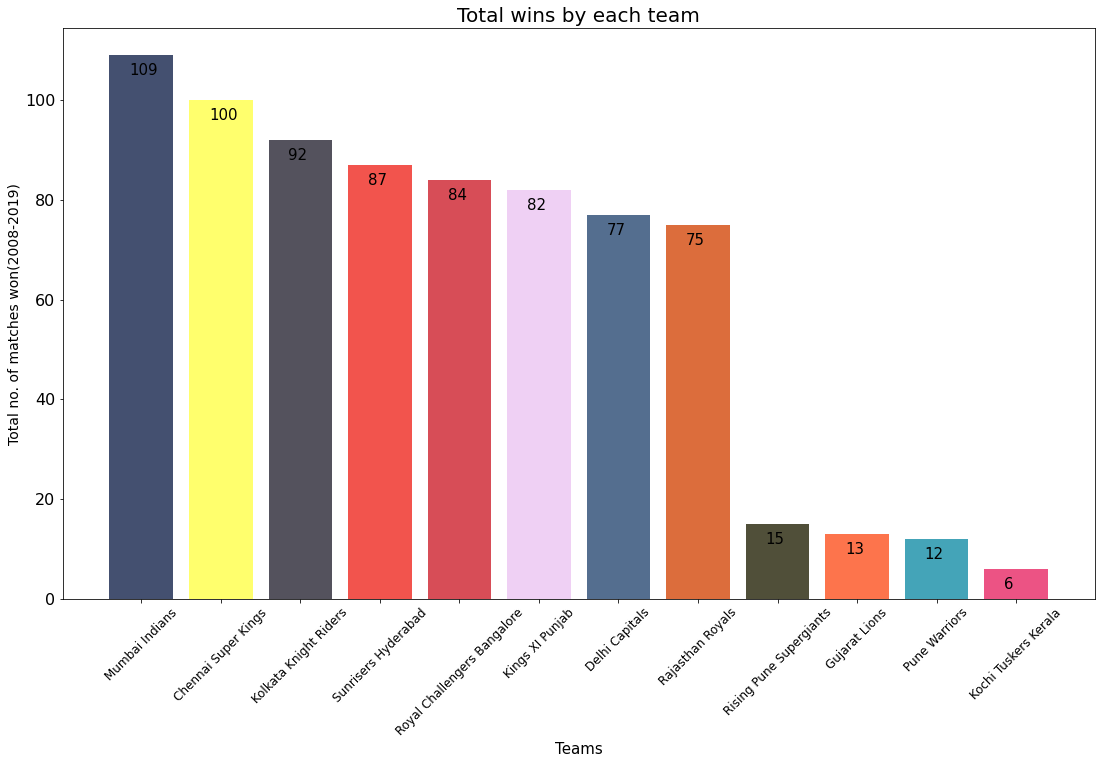

In [30]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=0)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

<center><font size=4><b>Top 20 players with most MOM awards</b></font></center>

Text(0, 0.5, 'Players')

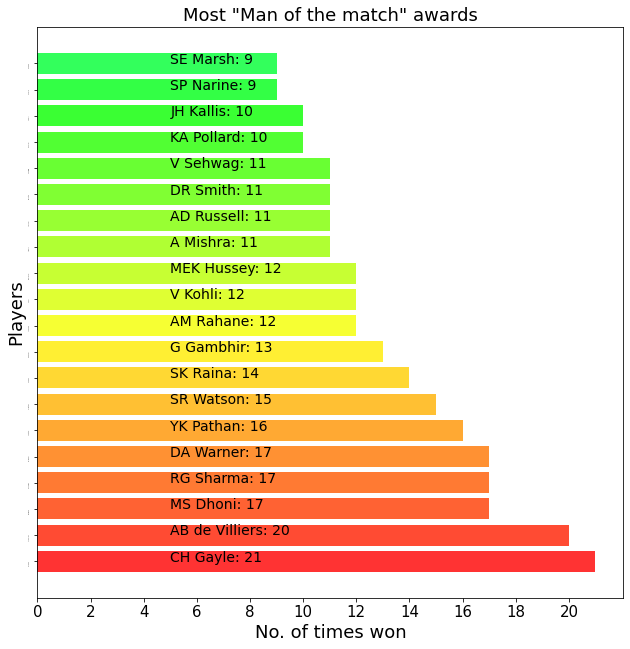

In [31]:
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
plt.yticks(rotation=90,fontsize=0)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.barh(players['name'], players['player_of_match'],color=plt.cm.hsv(np.arange(0,len(players)*5,5)),alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(5,count,players['name'][count]+': '+str(i),size=14)
    count+=1
plt.title('Most "Man of the match" awards',fontsize=18)
plt.xlabel('No. of times won',fontsize=18)
plt.ylabel('Players',fontsize=18)

<center><font size=4><b>Matches hosted in each city</b></font></center>
* Mumbai has hosted most no. of matches by far(101).
* As expected, top 8 cities are home grounds for the teams.

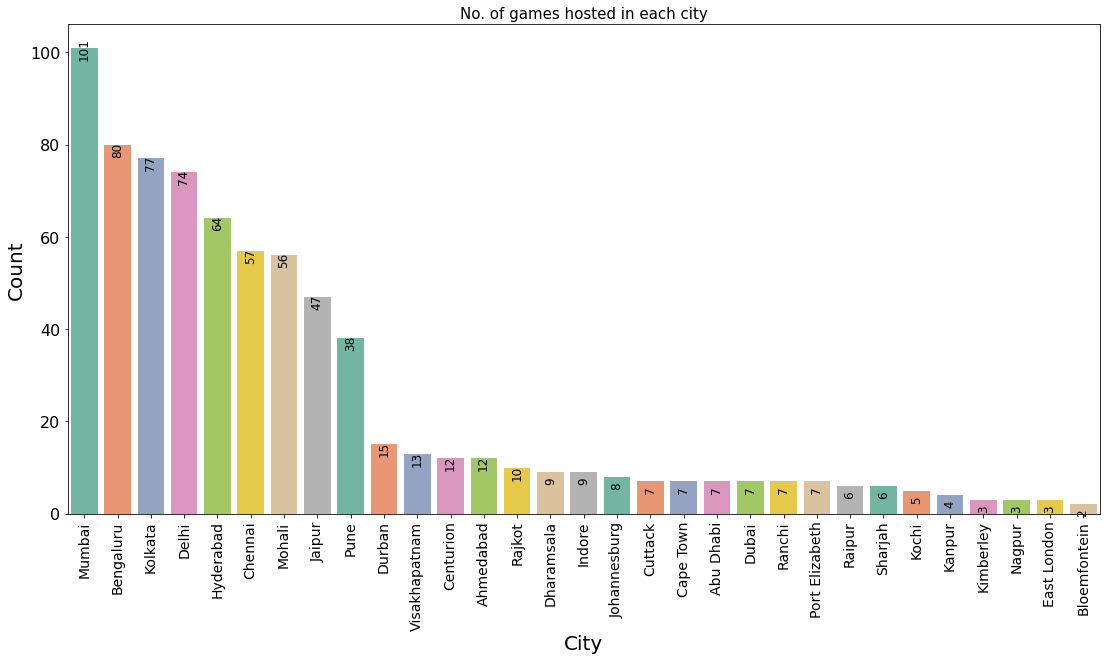

In [32]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data['city'],order=data['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(data['city'].value_counts())
cities['name']=data['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

<center><font size=4><b>No. of matches hosted at each stadium</b></font></center>

In [33]:
data['venue'].value_counts().index

Index(['M Chinnaswamy Stadium', 'Eden Gardens', 'Feroz Shah Kotla Ground',
       'Wankhede Stadium', 'Rajiv Gandhi International Stadium, Uppal',
       'M. A. Chidambaram Stadium', 'IS Bindra Stadium',
       'Sawai Mansingh Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr DY Patil Sports Academy', 'Kingsmead', 'ACA-VDCA Stadium',
       'SuperSport Park', 'Sardar Patel Stadium, Motera', 'Brabourne Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'New Wanderers Stadium',
       'Sheikh Zayed Stadium', 'Barabati Stadium',
       'Dubai International Cricket Stadium', 'Newlands', 'St George's Park',
       'JSCA International Stadium Complex', 'Sharjah Cricket Stadium',
       'Shaheed Veer Narayan Singh International Stadium', 'Nehru Stadium',
       'Green Park', 'Vidarbha Cricket Association Stadium, Jamtha',
       'De Beers Diamond Oval', 'Buffalo Park', 'OUTsurance Oval'],
  

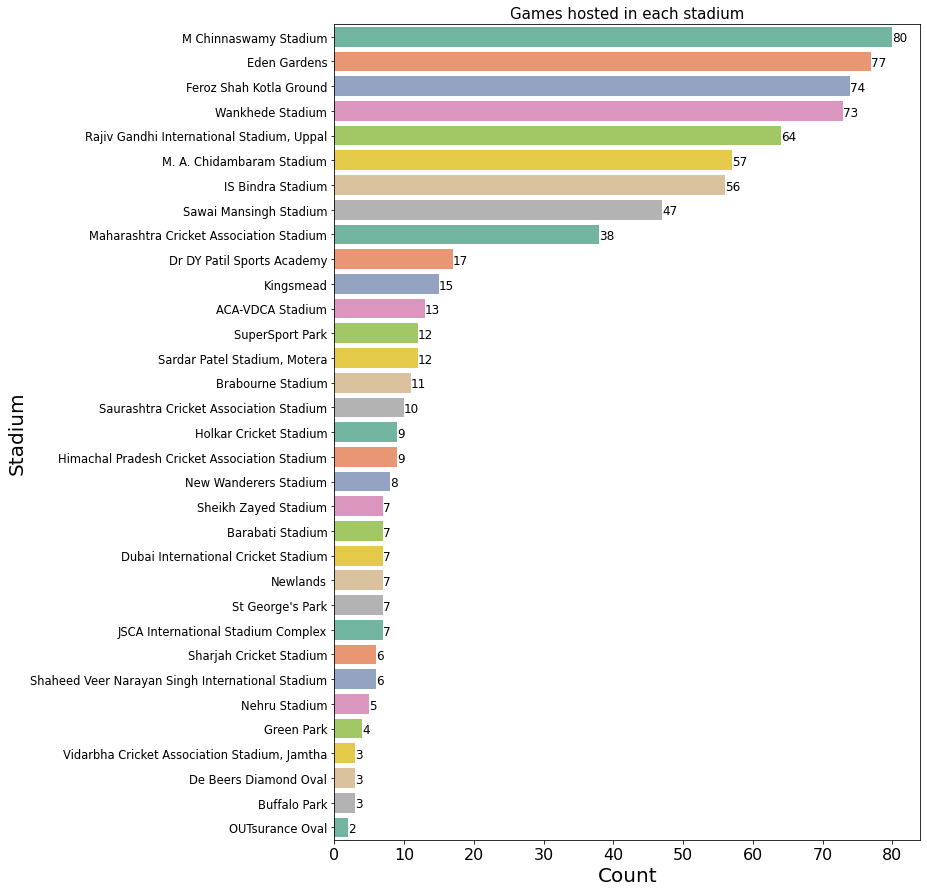

In [34]:
fig=plt.gcf()
fig.set_size_inches(10.5,15)

sns.countplot(y=data['venue'],order=data['venue'].value_counts().index,orient='v',palette='Set2')
plt.xticks(fontsize=16)
plt.yticks(fontsize=11.5)

plt.xlabel('Count',fontsize=20)
plt.ylabel('Stadium',fontsize=20)

plt.title('Games hosted in each stadium',fontsize=15)

count=0
venues=pd.DataFrame(data['venue'].value_counts())
venues['name']=data['venue'].value_counts().index
for i in venues['venue']:
    plt.text(i,count+0.2,str(i),size=12)
    count+=1
plt.show()

In [35]:
deliveries.head()

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
match_id,,,,,,,,,,,,,,,,,,,,
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
stadium_stats = deliveries.loc[:,["batsman_runs"]].reset_index()
stadium_stats[(stadium_stats["batsman_runs"]==4)|(stadium_stats["batsman_runs"]==6)]
stadium_stats['boundary'] = stadium_stats["batsman_runs"].apply(lambda x: x if (x==4 or x==6) else 0)
stadium_stats['not_boundary'] = stadium_stats["batsman_runs"].apply(lambda x: x if not (x==4 or x==6) else 0)
stadium_stats = stadium_stats.groupby('match_id').sum().drop('batsman_runs',axis=1).reset_index()

In [37]:
stadium_stats.head()

,match_id,boundary,not_boundary
0,1,230,136
1,2,222,137
2,3,236,112
3,4,184,127
4,5,168,120


In [38]:
stadium_stats = stadium_stats.merge(data.reset_index()[['id','venue']], how = 'inner',left_on='match_id', right_on = 'id').drop(['id','match_id'],axis=1)

In [39]:
stadium_stats = stadium_stats.groupby('venue').sum().sort_values("boundary",axis=0,ascending=False)
stadium_stats

,boundary,not_boundary
venue,,
M Chinnaswamy Stadium,15308,8948
Eden Gardens,13890,8752
Wankhede Stadium,13784,8635
Feroz Shah Kotla Ground,13150,8893
"Rajiv Gandhi International Stadium, Uppal",10636,8178
IS Bindra Stadium,9852,7466
M. A. Chidambaram Stadium,9422,7614
Sawai Mansingh Stadium,7602,6048
Maharashtra Cricket Association Stadium,6152,4922


In [40]:
cols = ['boundary','not_boundary']
tmp = stadium_stats.copy()
tmp[cols] = tmp[cols].div(tmp[cols].sum(axis=1), axis=0).multiply(100)
tmp["no_of_matches"] = venues['venue'][tmp.index]
tmp=tmp.sort_values('boundary',axis=0,ascending=False)
tmp

,boundary,not_boundary,no_of_matches
venue,,,
Himachal Pradesh Cricket Association Stadium,67.794118,32.205882,9
Green Park,66.343042,33.656958,4
Holkar Cricket Stadium,65.756378,34.243622,9
M Chinnaswamy Stadium,63.110158,36.889842,80
Wankhede Stadium,61.483563,38.516437,73
Eden Gardens,61.346171,38.653829,77
Feroz Shah Kotla Ground,59.656127,40.343873,74
Brabourne Stadium,59.176863,40.823137,11
SuperSport Park,57.906977,42.093023,12


In [41]:
tmp[tmp["no_of_matches"]>20]

,boundary,not_boundary,no_of_matches
venue,,,
M Chinnaswamy Stadium,63.110158,36.889842,80
Wankhede Stadium,61.483563,38.516437,73
Eden Gardens,61.346171,38.653829,77
Feroz Shah Kotla Ground,59.656127,40.343873,74
IS Bindra Stadium,56.888786,43.111214,56
"Rajiv Gandhi International Stadium, Uppal",56.532370,43.467630,64
Sawai Mansingh Stadium,55.692308,44.307692,47
Maharashtra Cricket Association Stadium,55.553549,44.446451,38
M. A. Chidambaram Stadium,55.306410,44.693590,57


In [42]:
stadiums=['M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla Ground', 'IS Bindra Stadium',
       'Rajiv Gandhi International Stadium, Uppal', 'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium', 'M. A. Chidambaram Stadium']

sample = data[data["venue"].isin(stadiums)]
sample.groupby(["venue","winner"]).count()["season"].to_frame().reset_index().pivot(index='venue',columns="winner")

season                 \
winner                                    Chennai Super Kings Delhi Capitals   
venue                                                                          
Eden Gardens                                              5.0            2.0   
Feroz Shah Kotla Ground                                   6.0           31.0   
IS Bindra Stadium                                         3.0            1.0   
M Chinnaswamy Stadium                                     5.0            4.0   
M. A. Chidambaram Stadium                                40.0            2.0   
Maharashtra Cricket Association Stadium                   6.0            3.0   
Rajiv Gandhi International Stadium, Uppal                 3.0            5.0   
Sawai Mansingh Stadium                                    3.0            2.0   
Wankhede Stadium                                          7.0            3.0   

                                                                         \
winner                                    Gujarat Lions Kings XI Punjab   
venue                                                                     
Eden Gardens                                        2.0             3.0   
Feroz Shah Kotla Ground                             1.0             5.0   
IS Bindra Stadium                                   2.0            30.0   
M Chinnaswamy Stadium                               1.0             5.0   
M. A. Chidambaram Stadium                           NaN             2.0   
Maharashtra Cricket Association Stadium             1.0             1.0   
Rajiv Gandhi International Stadium, Uppal           NaN             4.0   
Sawai Mansingh Stadium                              NaN             1.0   
Wankhede Stadium                                    1.0             5.0   

                                                                \
winner                                    Kochi Tuskers Kerala   
venue                                                            
Eden Gardens                                               1.0   
Feroz Shah Kotla Ground                                    1.0   
IS Bindra Stadium                                          NaN   
M Chinnaswamy Stadium                                      NaN   
M. A. Chidambaram Stadium                                  NaN   
Maharashtra Cricket Association Stadium                    NaN   
Rajiv Gandhi International Stadium, Uppal                  NaN   
Sawai Mansingh Stadium                                     NaN   
Wankhede Stadium                                           1.0   

                                                                 \
winner                                    Kolkata Knight Riders   
venue                                                             
Eden Gardens                                               45.0   
Feroz Shah Kotla Ground                                     5.0   
IS Bindra Stadium                                           4.0   
M Chinnaswamy Stadium                                       8.0   
M. A. Chidambaram Stadium                                   2.0   
Maharashtra Cricket Association Stadium                     6.0   
Rajiv Gandhi International Stadium, Uppal                   5.0   
Sawai Mansingh Stadium                                      3.0   
Wankhede Stadium                                            1.0   

                                                                        \
winner                                    Mumbai Indians Pune Warriors   
venue                                                                    
Eden Gardens                                        10.0           NaN   
Feroz Shah Kotla Ground                              4.0           1.0   
IS Bindra Stadium                                    4.0           1.0   
M Chinnaswamy Stadium                                9.0           NaN   
M. A. Chidambaram Stadium                            5.0           1.0   
Mah

In [43]:
sorted(deliveries["player_dismissed"].unique().astype(str))

['A Ashish Reddy',
 'A Chopra',
 'A Choudhary',
 'A Flintoff',
 'A Hales',
 'A Kumble',
 'A Mishra',
 'A Mithun',
 'A Mukund',
 'A Nehra',
 'A Nel',
 'A Singh',
 'A Symonds',
 'A Turner',
 'A Uniyal',
 'A Zampa',
 'AA Bilakhia',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke',
 'AB Agarkar',
 'AB Barath',
 'AB Dinda',
 'AB McDonald',
 'AB de Villiers',
 'AC Blizzard',
 'AC Gilchrist',
 'AC Thomas',
 'AC Voges',
 'AD Mascarenhas',
 'AD Mathews',
 'AD Nath',
 'AD Russell',
 'AF Milne',
 'AG Murtaza',
 'AG Paunikar',
 'AJ Finch',
 'AJ Tye',
 'AL Menaria',
 'AM Nayar',
 'AM Rahane',
 'AN Ahmed',
 'AN Ghosh',
 'AP Dole',
 'AP Majumdar',
 'AP Tare',
 'AR Patel',
 'AS Rajpoot',
 'AS Raut',
 'AS Yadav',
 'AT Rayudu',
 'AUK Pathan',
 'Anirudh Singh',
 'Ankit Sharma',
 'Ankit Soni',
 'Anureet Singh',
 'Azhar Mahmood',
 'B Akhil',
 'B Chipli',
 'B Kumar',
 'B Laughlin',
 'B Lee',
 'B Sumanth',
 'BA Bhatt',
 'BA Stokes',
 'BAW Mendis',
 'BB McCullum',
 'BB Samantray',
 'BB Sran',
 'BCJ Cutting',
 '

In [44]:
tmp = deliveries[deliveries["is_super_over"]==1].reset_index().merge(data.reset_index()[["id","winner"]], how = 'inner',left_on='match_id', right_on = 'id').drop(['id','match_id'],axis=1)
tmp.groupby(["bowler","bowling_team","batting_team"]).first()["winner"].to_frame()

winner
bowler         bowling_team                batting_team                                            
BAW Mendis     Kolkata Knight Riders       Rajasthan Royals                        Rajasthan Royals
CH Morris      Rajasthan Royals            Kings XI Punjab                          Kings XI Punjab
DW Steyn       Sunrisers Hyderabad         Royal Challengers Bangalore          Sunrisers Hyderabad
J Theron       Kings XI Punjab             Chennai Super Kings                      Kings XI Punjab
JJ Bumrah      Mumbai Indians              Gujarat Lions                             Mumbai Indians
JP Faulkner    Gujarat Lions               Mumbai Indians                            Mumbai Indians
               Rajasthan Royals            Kolkata Knight Riders                   Rajasthan Royals
Kamran Khan    Rajasthan Royals            Kolkata Knight Riders                   Rajasthan Royals
M Muralitharan Chennai Super Kings         Kings XI Punjab                          Kings XI Punjab
MG Johnson     Kings XI Punjab             Rajasthan Royals                         Kings XI Punjab
R Rampaul      Royal Challengers Bangalore Delhi Capitals               Royal Challengers Bangalore
R Vinay Kumar  Royal Challengers Bangalore Sunrisers Hyderabad                  Sunrisers Hyderabad
SP Narine      Kolkata Knight Riders       Rajasthan Royals                        Rajasthan Royals
UT Yadav       Delhi Capitals              Royal Challengers Bangalore  Royal Challengers Bangalore

In [45]:
board = tmp[tmp["is_super_over"]==1]["bowler"].value_counts().to_frame("Balls Bowled in Super Over")
board["Winner"] = tmp["winner"]

In [46]:
deliveries.groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).to_frame("Wickets")

,Wickets
bowler,
SL Malinga,188
DJ Bravo,168
A Mishra,165
Harbhajan Singh,161
PP Chawla,156
...,...
CK Kapugedera,0
NL McCullum,0
K Upadhyay,0


In [47]:
def rowIndex(row):
    return data.loc[row.name]['venue']

deliveries['venue'] = deliveries.apply(rowIndex, axis=1)

In [48]:
deliveries.columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder', 'venue'],
      dtype='object')

In [49]:
runs = deliveries.reset_index().groupby(['match_id','inning']).sum()['total_runs'].to_frame().reset_index()
runs.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


In [50]:
deliveries['player_dismissed'] = deliveries['player_dismissed'].fillna("0")
deliveries['player_dismissed'] = deliveries['player_dismissed'].apply(lambda x:0 if x=="0" else 1)

In [51]:
deliveries['runs_last_5'] = deliveries['total_runs'].rolling(min_periods=1, window=30).sum()
deliveries['wickets_last_5'] = deliveries['player_dismissed'].rolling(min_periods=1, window=30).sum()
deliveries['runs'] = deliveries['total_runs'].cumsum(axis = 0)
deliveries['wickets'] = deliveries['player_dismissed'].cumsum(axis = 0)

In [52]:
deliveries['over'] = deliveries['over']-1
deliveries['overs'] = deliveries['over'].astype(str) +"."+deliveries['ball'].astype(str)

In [53]:
final = pd.merge(deliveries, runs, left_on=['match_id','inning'], right_on=['match_id','inning'])

In [54]:
final=final[final['inning']==1]
final.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_x', 'player_dismissed',
       'dismissal_kind', 'fielder', 'venue', 'runs_last_5', 'wickets_last_5',
       'runs', 'wickets', 'overs', 'total_runs_y'],
      dtype='object')

In [55]:
final = final.loc[:,['match_id','inning', 'batting_team', 'bowling_team', 'overs','runs', 'wickets','venue','total_runs_y','runs_last_5', 'wickets_last_5']]

In [56]:
final.to_csv("final.csv",index=False)